# Questions I am trying to answer 
  
    How age affected the survival rate ?
    
    How the socio-economic class affected the survival rate ?
        
    Which gender has more surival rate ?
    
    If female survival rate is higher, how does it vary from socio-economic class ?
    
   

In [2]:

import numpy as np
import pandas as pd
import csv
from scipy import stats

#reading data to pandas DataFrame

titanic_data = pd.read_csv('titanic_data.csv')



## Cleaning the Data 


In [3]:
print(titanic_data.shape)
print('')
titanic_data.info()

(891, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Here we can see that some of the passenger's age is missing and most of their cabin data is not given. Well 177 values corresponding to Age,687 values of Cabin data and 2 values of Embarked data are missing. We aren't worried about the cabin data or the place where passengers embarked, as we are not drawing any conclusions based on that data. I want to categorize the passengers based on Age, so I'll categorize the passengers whose age is not given under a different category and then proceed with drawing conclusions.


In [4]:
#remove the un used colomns to make data more concise
#we are not going to need PassengerId, ticket.

titanic_data.drop(['PassengerId', 'Ticket', 'Fare', 'Embarked'], axis = 1, inplace = True)

#make sure coloumns are dropped

titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Cabin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C85
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,C123
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,NaN


In [5]:
# now let us check whether all the values are given in the coloums
titanic_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
dtype: int64

We already know about missing Age and Cabin values. We'll handle missing Age values by categorizing them under a different category. Cabin data we are not worried about. All the other values are present. Let us remove those data entries whose age is not given. 

In [6]:
#removing data entries whose age is not given
cleaned_data = titanic_data[np.isfinite(titanic_data['Age'])]
cleaned_data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373
std,0.491460,0.838250,14.526497,0.929783,0.853289
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000


## Let us start examining the data

### How Age affected survival rate ?

In [6]:
print(cleaned_data.groupby('Survived').describe()['Age'])

print('Children whose age is below 1 year') # a line
cleaned_data.Age[ cleaned_data['Age'] < 1.0 ].count()

Survived       
0         count    424.000000
          mean      30.626179
          std       14.172110
          min        1.000000
          25%       21.000000
          50%       28.000000
          75%       39.000000
          max       74.000000
1         count    290.000000
          mean      28.343690
          std       14.950952
          min        0.420000
          25%       19.000000
          50%       28.000000
          75%       36.000000
          max       80.000000
Name: Age, dtype: float64
Children whose age is below 1 year


7

This shows formal analysis regarding age affecting the survival rate. Here we can see that most of the measures are same. Mean age for survived passengers is around 30, while for those who passed away is around 28. Both standard deviations are also same. Even the Quartiles contain same numbers. 

*No Children whose age is below 1 year died in the disaster*

Populating the interactive namespace from numpy and matplotlib


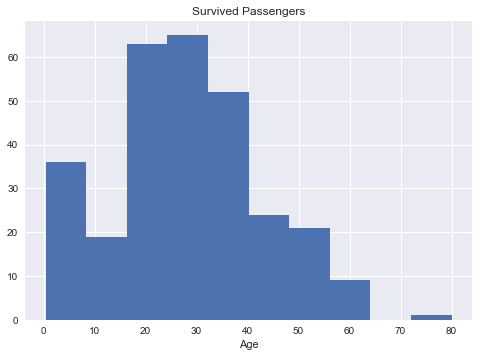

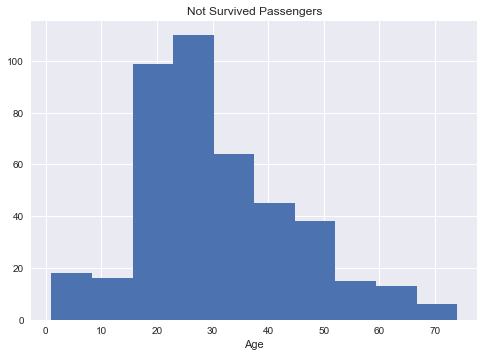

In [7]:
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

#survived data
survived_data = cleaned_data[ cleaned_data['Survived'] == 1 ]['Age']

#not survived data
not_survived_data = cleaned_data[cleaned_data['Survived'] == 0 ]['Age']


plt.figure(1)
survived_data.hist()
plt.title('Survived Passengers')
plt.xlabel('Age')
plt.show()

plt.figure(2)
not_survived_data.hist()
plt.title('Not Survived Passengers')
plt.xlabel('Age')
plt.show()

So by looking at the above plots we can draw initial conclusions, that age has no effect on any Age group except children ( < 15 -16 ). 

*More number of children had survived in this disaster, or we can put this way, children are given priority for life boats*

**But age, on a whole has no effect on survival rate**

In [7]:
##stats.ttest_ind(survived_data,not_survived_data)

NameError: name 'survived_data' is not defined

### How the socio-economic class affected the survival rate ?

In [10]:
#let us take a look at some measures

titanic_data.groupby(['Pclass', 'Survived']).count()['Name']

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Name, dtype: int64

These initial counts based on Name of the passengers show that survival rate is more in class 1 aka the class where rich people boarded

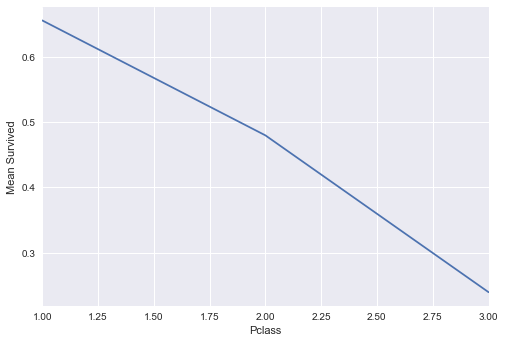

In [11]:
#let us plot mean of survived against Pclass
plt.figure(1)
cleaned_data.groupby('Pclass').mean()['Survived'].plot()
plt.xlabel('Pclass')
plt.ylabel('Mean Survived')


This plot shows how mean is towards 1 when Pclass is 1 and it is towards 0 when Pclass is 3

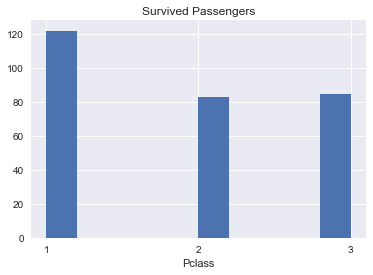

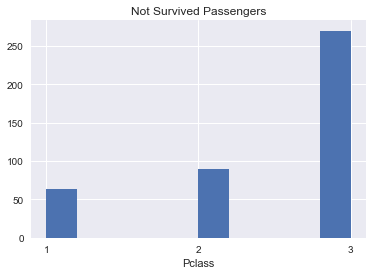

In [12]:

#for more clarity let us use individual plots for survived vs non-survived passengers

#survived data
survived_data = cleaned_data[ cleaned_data['Survived'] == 1 ]['Pclass']

#not survived data
not_survived_data = cleaned_data[cleaned_data['Survived'] == 0 ]['Pclass']

#plot for survived passengers
plt.figure(2)
survived_data.hist()
plt.title('Survived Passengers')
plt.xlabel('Pclass')
plt.xticks(range(1,4))
plt.show()

#plot for non survived passengers
plt.figure(3)
not_survived_data.hist()
plt.title('Not Survived Passengers')
plt.xlabel('Pclass')
plt.xticks(range(1,4))
plt.show()

These histograms clearly show us, how survival rate is effected by socio-economic class. Class passengers survived more than other classes. Non survived passengers are more in class 3. 

**Pclass has effect on survival rate**

## Which gender has more surival rate ?

Our intuition is females have more survival rate than males

In [13]:
titanic_data.groupby(['Survived', 'Sex']).count()['Name']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Name, dtype: int64

This count of names clearly shows us, females are given more priority than males

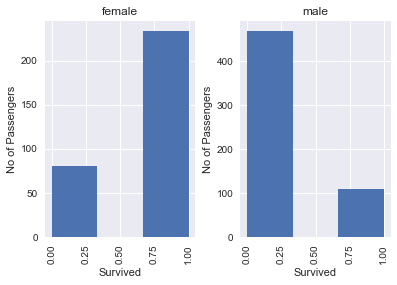

In [14]:
hists = titanic_data['Survived'].hist(by = titanic_data['Sex'], bins = 3)

hists[0].set_xlabel('Survived')
hists[0].set_=ylabel('No of Passengers')

hists[1].set_xlabel('Survived')
hists[0].set_ylabel('No of Passengers')


These histograms clearly show us how females are given priority for saving them in this disaster. 

** Females are given priority compared to males in allocating life boats and more females survived in this disaster **

## If female survival rate is higher, how does it vary from socio-economic class ?
 Are females from Class 1 survived more than other classes ? We are going to examine Now

In [13]:
female_data = titanic_data[ titanic_data['Sex'] == 'female' ]
female_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 1 to 888
Data columns (total 8 columns):
Survived    314 non-null int64
Pclass      314 non-null int64
Name        314 non-null object
Sex         314 non-null object
Age         261 non-null float64
SibSp       314 non-null int64
Parch       314 non-null int64
Cabin       97 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 22.1+ KB


In [14]:
female_data.groupby('Pclass').mean()['Survived']

Pclass
1    0.968085
2    0.921053
3    0.500000
Name: Survived, dtype: float64

Look at those means pertaining to Survived females among different classes. Class 1 and Class 2 females have mean close to 1, while class 3 has only 0.5 as mean. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D60894DB70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002D608648860>]], dtype=object)

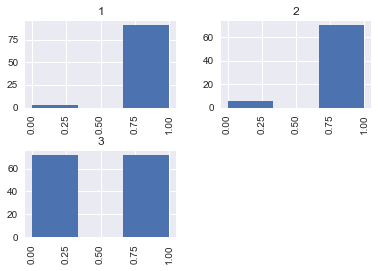

In [17]:
female_data.hist( column = 'Survived', by = 'Pclass', bins = 3)

These histograms show clearly show us class 1 females have more survival rate, while class 2 close to class 1. While in class 3 half of the females has survived, while half them died in this disaster.

** Class 1 and Class 2 females are given more priority compared to class 3 females **